In [38]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Estimation

### Sample Median

In [39]:
sf = Table.read_table('san_francisco_2015.csv')
sf.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2


In [40]:
dept_comp_tbl = sf.select("Department Code", "Total Compensation").group("Department Code", np.average)

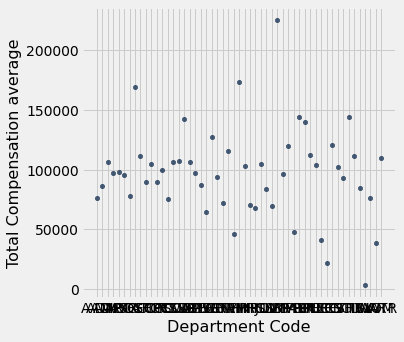

In [41]:
dept_comp_tbl.scatter("Department Code", "Total Compensation average")

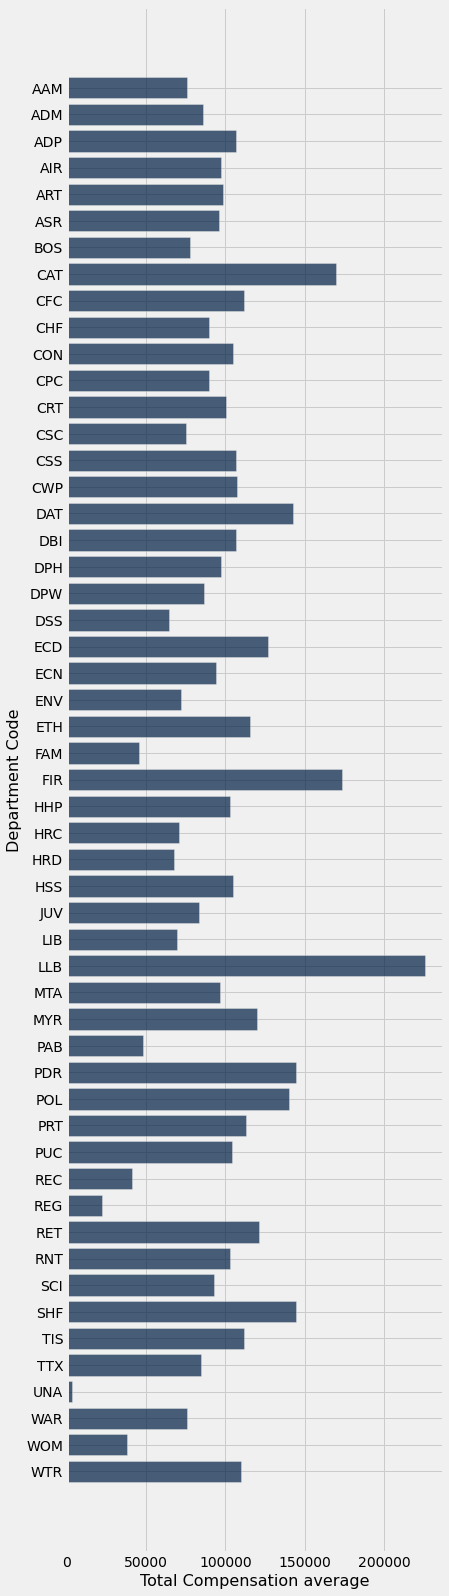

In [42]:
dept_comp_tbl.barh("Department Code", "Total Compensation average")

In [43]:
sf.where('Department Code', "LLB")

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,5,Culture & Recreation,LLB,Law Library,220,Law Librarian and Assistant,8100,Legal & Court,0180,Law Librarian,39720,175959,0,0,175959,48612.1,12424.5,18058.1,79094.7,255053
Calendar,2015,5,Culture & Recreation,LLB,Law Library,220,Law Librarian and Assistant,8100,Legal & Court,0170,Assistant Law Librarian,41931,130000,0,0,130000,36491.3,12424.5,17158.8,66074.6,196075


In [44]:
# We only care about salary for now
salary_sf = sf.select(3, 11, 21)
salary_sf

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,117767
"Public Works, Transportation & Commerce",Soft Floor Coverer,41209.8
Community Health,Health Care Billing Clerk 2,110561
Community Health,Food Service Mgr Administrator,38625
"Public Works, Transportation & Commerce",School Crossing Guard,11438.2
Public Protection,Police Officer,3188.65
Community Health,Nurse Practitioner,260281
"Public Works, Transportation & Commerce",Transit Operator,111057
General Administration & Finance,Attorney (Civil/Criminal),186781
Human Welfare & Neighborhood Development,Emp & Training Spec 2,103610


In [45]:
sample_from_pop = salary_sf.sample(300, with_replacement=False)
sample_from_pop.show(5)

Organization Group,Job,Total Compensation
Public Protection,Police Cadet,5287.07
Public Protection,Police Officer 3,241086
Public Protection,Police Officer 3,166725
Community Health,Special Nurse,155880
Human Welfare & Neighborhood Development,Eligibility Worker Supervisor,123480


In [46]:
estimate_median = percentile(50, sample_from_pop.column('Total Compensation'))
estimate_median

96902.51

**Question:** How far off is our estimate from the true median?
<details>
<summary>Solution</summary>
  percentile(50, salary_sf.column('Total Compensation')) - estimate_median
</details>

In [47]:
percentile(50, salary_sf.column('Total Compensation')) - estimate_median 

1272.3899999999994

**Question:** How far off is our estimate from the true median if we don't have the whole population?


<details>
<summary>Solution</summary>
  We don't know. But this what a confidence interval will help us with.
  CI will give us some notion of our uncertainty about the population parameter using our estimator
</details>


Now it's time to resample.

**Question:** How do we resample if we don't have the entire population


<details>
<summary>Solution</summary>
  We don't know. But this what a confidence interval will help us with.
  CI will give us some notion of our uncertainty about the population parameter using our estimator.
    So, let's resample
</details>

<details>
<summary>Code</summary>
  resample = sample_from_pop.sample(with_replacement=True)
</details>



In [48]:
resample = sample_from_pop.sample(with_replacement=True)

Now let's get the median from `resample`

<details>
<summary>Code</summary>
  percentile(50, resample.column('Total Compensation')), np.median(resample.column('Total Compensation'))
</details>

In [53]:
percentile(50, resample.column("Total Compensation")) #, np.median(resample.column("Total Compensation"))

96951.21

We resample from `resample` as a proxy to simulate what would happen if we resampled from the population again each time.

Resampling is cheap, let's put the computer to work instead of us!

**Question:** What do we mean by "Resampling is cheap, let's put the computer to work instead of us!""?


### Calculating resampled medians 1k times

**Question:** How can we calculate 1k resampled medians?

<details>
<summary>Code</summary>
    tmp_resample = resample.sample(with_replacement=True)
    new_median = percentile(50, tmp_resample.column("Total Compensation"))
    sample_medians = np.append(sample_medians, new_median)
</details>



1000


/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


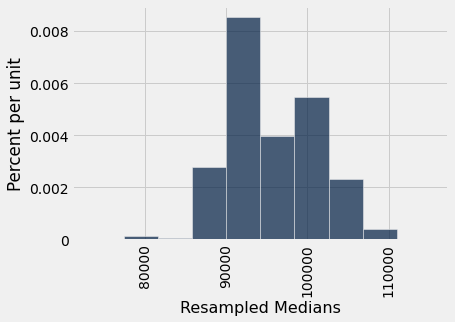

In [58]:
sample_medians = make_array()

for i in np.arange(1000):
    tmp_resample = resample.sample(with_replacement = True)
    new_median = percentile(50, tmp_resample.column("Total Compensation"))
    sample_medians = np.append(sample_medians, new_median)

print(len(sample_medians))

Table().with_column('Resampled Medians', sample_medians).hist() 

**Question:** Where are most of the resample medians in `sample_medians`? What can we use to determine this?

<details>
<summary>Solution</summary>
    let's use percentiles
</details>

In [60]:
sample_medians
percentile(2.5, sample_medians), percentile(97.5, sample_medians)

(86638.25, 106501.95)

**Question:** What do `percentile(2.5, sample_medians)` and `percentile(97.5, sample_medians)` indicate?
    
<details>
<summary>Solution</summary>
    This interval is an estimate of the population parameter.
    
    In other words, we are 95% confident that the population parameter lies between this range
</details>   

In [61]:
percentile(50, salary_sf.column("Total Compensation"))

98174.9

We are saying that if we repeat this process 100 times, we are confident that 95% of the times the population parameter will be in our range

**Question:** What do we mean by "repeat this process 100 times"? What is this process?
<details>
<summary>Solution</summary>
    Starting from sampling from the population all the way to compute the confidence interval
    
    
</details>   

**Question:** Is our population parameter indeed in this interval?
    
<details>
<summary>Solution</summary>
    Let's check
</details>   

**Question:** How do we increase our confidence level?
<details>
<summary>Solution</summary>
    Just increase the range/width of the interval?
</details>   

**Question:** How do we increase our confidence level to 99%?

In [69]:
percentile(0.5, sample_medians), percentile(99.5, sample_medians)

(79802.72, 107400.74)

## Is this technique reliable?


Repeat this process 100 times and keep track of how many times the true population parameter was indeed in this interval

*Run this before discussing it because it will take about a minute to run*

In [62]:
%%time
# This will take a while to run
intervals = Table().with_columns('Lower', make_array(), 'Upper', make_array())

for i in np.arange(100):
    sample_from_pop = salary_sf.sample(300, with_replacement=False)
    medians = make_array()
    
    for j in np.arange(1000):
        resample = sample_from_pop.sample(with_replacement=True)
        median = percentile(50, resample.column('Total Compensation'))
        medians = np.append(medians, median)
        
    interval = make_array(
                percentile(2.5, medians), 
                percentile(97.5, medians))
    
    intervals.append(interval)

CPU times: user 2min 27s, sys: 76.4 ms, total: 2min 27s
Wall time: 2min 45s


Now let's check how many times our intervals included the true parameter

In [63]:
true_median = percentile(50, salary_sf.column('Total Compensation'))
intervals.where('Lower', are.not_above(true_median)).where('Upper', are.not_below(true_median)).num_rows

94

**Question:** How many times was the true median below our lower bound?

<details>
<summary>Solution</summary>
    intervals.where('Lower', are.above(true_median))
</details>   

In [67]:
true_median

98174.9

In [66]:
intervals.where('Lower', are.above(true_median))

Lower,Upper
100374,115101
100130,114787
100829,114013


**Question:** How many times was the true median above our upper bound?

<details>
<summary>Solution</summary>
    intervals.where('Upper', are.below(true_median))
</details>   

In [68]:
intervals.where('Upper', are.below(true_median))

Lower,Upper
81943.3,96250.4
83972.6,96403
82648,96117.9


(back to slides)

# Averages/Means

In [ ]:
values = make_array(2, 3, 3, 9)
values

#### Different ways to compute the average

In [ ]:
sum(values)/len(values)

In [ ]:
np.mean(values), np.average(values)

In [ ]:
(2 + 3 + 3 + 9)/4

In [ ]:
2*(1/4) + 3*(2/4) + 9*(1/4)

#### Averages & Histograms

In [ ]:
values_table = Table().with_columns('value', values)
values_table

In [ ]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

**Question:** Where is the average in the figure above?

**Question:** What if we add more values but keep the proportions the same?

In [ ]:
# Make array of 10 2s, 20 3s, and 10 9s

new_values = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)
Table().with_column('value', new_values).hist(bins = bins_for_display)
np.average(new_values)

(back to slides)
#### Which is bigger, mean or median?

In [ ]:
nba = Table.read_table('nba2013.csv')
nba
heights = nba.column('Height')
percentile(50, heights), np.mean(heights)

nba.hist('Height', bins=np.arange(65.5, 90.5))
percentile(50, heights), np.mean(heights)

# Standard Deviation

In [ ]:
values = make_array(2, 3, 3, 9)
sd_table = Table().with_columns('Value', values)
sd_table

**Question:** How far is each example from the mean?
    
<details>
<summary>Solution</summary>
  Compute the average value then subtract that by each value
</details>

In [ ]:
...
deviations = ...
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

**Question**: What is the typical deviation? What do we use to compute the "typical"?
<details>
<summary>Solution</summary>
  average
</details>

**Question**: Average is the sum divided by the number of examples. What is the sum of these deviations?
<details>
<summary>Solution</summary>
  sum(deviations)
</details>

What we care about is the size of the deviation.

We've use `abs()` to find the size before, but here we will take the square value of the deviations

In [ ]:
deviations ** 2

In [ ]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Variance of the data is the avergae of these squared deviations


In [ ]:
variance = np.mean(sd_table.column('Squared Deviation'))
variance

Standard Deviation (SD) is the square root of the variance

The square root gets us back to the same units as in the data

In [ ]:


sd = variance ** 0.5
sd

#### Computing std in numpy 

In [ ]:
np.std(values)

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_17_completed.ipynb")